In [42]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import ExtraTreesClassifier

dataset = pd.read_csv("C:/Users/shste/OneDrive/Desktop/MSDA/Summer 2023/Data Mining 2/Final Project/Final Project/Hospital Records.csv")

#Print the dataset
dataset

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


In [43]:
#drop rows with NA values in any columns
# Assuming 'df' is your DataFrame
columns_to_remove = ['icu_id', 'patient_id', 'hospital_id', 'encounter_id']
dataset = dataset.drop(columns=columns_to_remove)

dataset

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,68.0,22.730000,0,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,77.0,27.420000,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,admit,Med-Surg ICU,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,admit,CTICU,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,admit,Med-Surg ICU,0.073611,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.0,23.060250,0,Caucasian,M,177.8,Floor,admit,Cardiac ICU,0.298611,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,56.0,47.179671,0,Caucasian,F,183.0,Floor,admit,Med-Surg ICU,0.120139,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,admit,Med-Surg ICU,0.046528,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,admit,Med-Surg ICU,0.081944,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


In [44]:
# Calculate the percentage of missing values in each column
missing_percentage = (dataset.isnull().sum() / len(dataset)) * 100

# Get the list of columns where the missing percentage is greater than 15%
columns_to_drop = missing_percentage[missing_percentage > 15].index

# Drop the columns with missing values more than 15%
dataset = dataset.drop(columns=columns_to_drop)

dataset

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.730000,0,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,77.0,27.420000,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,admit,Med-Surg ICU,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,admit,CTICU,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,admit,Med-Surg ICU,0.073611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.0,23.060250,0,Caucasian,M,177.8,Floor,admit,Cardiac ICU,0.298611,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0
91709,56.0,47.179671,0,Caucasian,F,183.0,Floor,admit,Med-Surg ICU,0.120139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
91710,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,admit,Med-Surg ICU,0.046528,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
91711,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,admit,Med-Surg ICU,0.081944,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0


In [45]:
# Check for null values
dataset.isnull().sum()

age                            4228
bmi                            3429
elective_surgery                  0
ethnicity                      1395
gender                           25
                               ... 
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
hospital_death                    0
Length: 80, dtype: int64

In [48]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [54]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [62]:
# Handle missing values (replace NaN with mean)
dataset.fillna(dataset.mean(), inplace=True)
# Separate numeric columns
numeric_columns = dataset.select_dtypes(include='number')

# Scale the numeric columns
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_columns)

#Convert scaled numeric data to a DataFrame with the same column names as the original DataFrame
numeric_scaled_df = pd.DataFrame(numeric_scaled, columns=numeric_columns.columns)

C:\Users\shste\AppData\Local\Temp\ipykernel_16320\3189294987.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace=True)


## K-MEANS

In [71]:
# Separate numeric and categorical columns
numeric_columns = dataset.select_dtypes(include='number').columns.tolist()
categorical_columns = dataset.select_dtypes(include='object').columns.tolist()

# Preprocess numeric variables (scaling)
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Preprocess categorical variables (one-hot encoding)
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

# Create a preprocessor for both numeric and categorical columns
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_columns),
    ('cat', categorical_transformer, categorical_columns)])


In [72]:
# Fit and transform the data with the preprocessor
data_transformed = preprocessor.fit_transform(dataset)

In [73]:
# Calculate silhouette scores for different K values
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_transformed)
    silhouette_scores.append(silhouette_score(data_transformed, cluster_labels))

# Print silhouette scores for different K values
print("Silhouette Scores:")
for k, score in enumerate(silhouette_scores, start=2):
    print(f"K={k}: {score:.4f}")


Silhouette Scores:
K=2: 0.1089
K=3: 0.0626
K=4: 0.0535
K=5: 0.0575
K=6: 0.0492
K=7: 0.0504
K=8: 0.0487
K=9: 0.0369
K=10: 0.0486


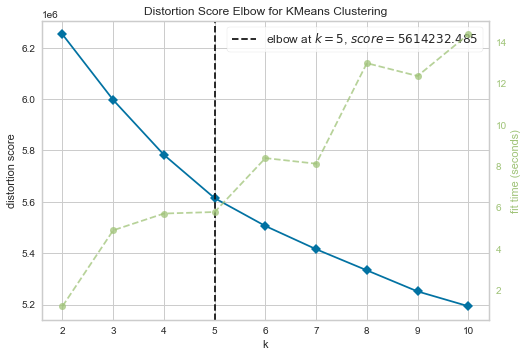

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
# Elbow Method - Visualize the inertia for different K values
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 11))
visualizer.fit(data_transformed)
visualizer.show()

In [122]:
# Apply K-means with the optimal number of clusters (K)
optimal_k=5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(data_transformed)



In [136]:
# Add the cluster labels to the original data
dataset['Clusters'] = cluster_labels

dataset

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,Cluster,Clusters
0,68.000000,22.730000,0,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,...,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0,1,1
1,77.000000,27.420000,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,...,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0,0,0
2,25.000000,31.950000,0,Caucasian,F,172.7,Accident & Emergency,admit,Med-Surg ICU,0.000694,...,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0,3,3
3,81.000000,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,admit,CTICU,0.000694,...,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0,4,4
4,19.000000,29.185818,0,Caucasian,M,188.0,Accident & Emergency,admit,Med-Surg ICU,0.073611,...,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.000000,23.060250,0,Caucasian,M,177.8,Floor,admit,Cardiac ICU,0.298611,...,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0,1,1
91709,56.000000,47.179671,0,Caucasian,F,183.0,Floor,admit,Med-Surg ICU,0.120139,...,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0,1,1
91710,48.000000,27.236914,0,Caucasian,M,170.2,Accident & Emergency,admit,Med-Surg ICU,0.046528,...,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0,1,1
91711,62.309516,23.297481,0,Caucasian,F,154.9,Accident & Emergency,admit,Med-Surg ICU,0.081944,...,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0,3,3


In [140]:
silhouette_avg = silhouette_score(data_transformed, cluster_labels)

In [141]:
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.05747493789527665


In [124]:
from sklearn.decomposition import PCA

In [125]:
# Reduce the data to 2D using PCA for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_transformed)



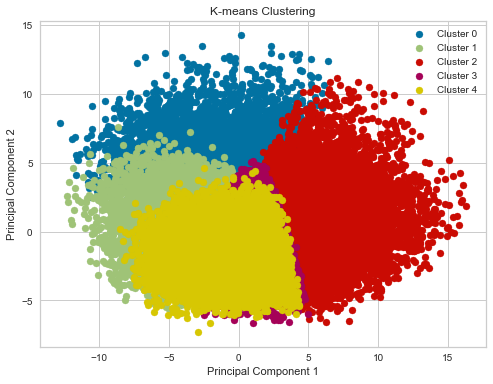

In [126]:
# Create a scatter plot for each cluster
plt.figure(figsize=(8, 6))
for cluster_id in range(optimal_k):
    cluster_data = data_2d[dataset['Cluster'] == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}')

plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [127]:
dataset['Cluster'].value_counts()

3    28626
1    21077
2    16883
4    15348
0     9779
Name: Cluster, dtype: int64

In [104]:
dataset[dataset['Cluster'] == cluster_id]

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,Cluster
3,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,admit,CTICU,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0,4
10,72.0,28.257052,1,Hispanic,F,154.9,Operating Room / Recovery,admit,Med-Surg ICU,0.004861,...,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory,0,4
11,80.0,27.382812,1,Caucasian,F,160.0,Operating Room / Recovery,admit,Med-Surg ICU,1.271528,...,0.0,0.0,0.0,1.0,0.0,0.0,Neurological,Neurologic,0,4
13,65.0,29.185818,1,Caucasian,M,172.7,Operating Room / Recovery,admit,Med-Surg ICU,1.045139,...,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal,0,4
14,81.0,38.189067,1,Caucasian,M,172.7,Operating Room / Recovery,admit,MICU,1.376389,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91639,19.0,25.045859,0,African American,M,172.7,Operating Room / Recovery,admit,Med-Surg ICU,0.040972,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0,4
91677,32.0,32.304688,1,Caucasian,F,160.0,Operating Room / Recovery,admit,Med-Surg ICU,0.009028,...,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0,4
91678,37.0,46.155648,1,Caucasian,M,152.4,Operating Room / Recovery,admit,Med-Surg ICU,0.015972,...,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal,0,4
91698,47.0,51.439842,1,Caucasian,M,195.0,Operating Room / Recovery,admit,Med-Surg ICU,0.033333,...,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal,0,4


In [105]:
# Group data by cluster labels and calculate mean values for each feature within each cluster
cluster_means = dataset.groupby('Cluster').mean()

# Find the distinguished features for each cluster
distinguished_features = {}
for cluster_id in range(optimal_k):
    cluster_feature_means = cluster_means.loc[cluster_id]
    distinguished_features[cluster_id] = cluster_feature_means[cluster_feature_means > cluster_means.mean()]

# Display the distinguished features for each cluster
for cluster_id, features in distinguished_features.items():
    print(f"Cluster {cluster_id}:")
    print(features.index.tolist())
    print()

Cluster 0:
['age', 'pre_icu_los_days', 'arf_apache', 'gcs_unable_apache', 'heart_rate_apache', 'intubated_apache', 'resprate_apache', 'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_noninvasive_max', 'd1_heartrate_max', 'd1_mbp_max', 'd1_mbp_noninvasive_max', 'd1_resprate_max', 'd1_spo2_max', 'd1_sysbp_max', 'd1_sysbp_noninvasive_max', 'd1_temp_max', 'h1_diasbp_max', 'h1_diasbp_noninvasive_max', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'd1_glucose_max', 'd1_potassium_max', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'hospital_death']

Cluster 1:
['age', 'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'heart_rate_apache', 'resprate_apache', 'temp_apache', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_temp_min', 'h1_heartrate_max', 'h1_heartrat

## H-Clustering

In [114]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [108]:
datasetHC=dataset
datasetHC

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,Cluster
0,68.000000,22.730000,0,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0,1
1,77.000000,27.420000,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0,0
2,25.000000,31.950000,0,Caucasian,F,172.7,Accident & Emergency,admit,Med-Surg ICU,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0,3
3,81.000000,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,admit,CTICU,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0,4
4,19.000000,29.185818,0,Caucasian,M,188.0,Accident & Emergency,admit,Med-Surg ICU,0.073611,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.000000,23.060250,0,Caucasian,M,177.8,Floor,admit,Cardiac ICU,0.298611,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0,1
91709,56.000000,47.179671,0,Caucasian,F,183.0,Floor,admit,Med-Surg ICU,0.120139,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0,1
91710,48.000000,27.236914,0,Caucasian,M,170.2,Accident & Emergency,admit,Med-Surg ICU,0.046528,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0,1
91711,62.309516,23.297481,0,Caucasian,F,154.9,Accident & Emergency,admit,Med-Surg ICU,0.081944,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0,3


In [110]:
datasetHC.drop('Cluster', axis=1, inplace=True)

In [111]:
#Separate numeric and categorical columns
numeric_columns = datasetHC.select_dtypes(include='number').columns.tolist()
categorical_columns = datasetHC.select_dtypes(include='object').columns.tolist()

# Preprocess numeric variables (scaling)
numeric_transformer = StandardScaler()

# Preprocess categorical variables (one-hot encoding)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')



In [112]:
# Create a preprocessor for both numeric and categorical columns
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_columns),
    ('cat', categorical_transformer, categorical_columns)])

# Fit and transform the data with the preprocessor
data_transformed = preprocessor.fit_transform(datasetHC)

In [118]:
n_components = 2
pca = PCA(n_components=n_components)
data_transformed_pca = pca.fit_transform(data_transformed)

In [120]:
distances = linkage(data_transformed_pca, method='ward', metric='euclidean')


MemoryError: Unable to allocate 31.3 GiB for an array with shape (4205591328,) and data type float64

In [ ]:
# Plot the dendrogram to determine the number of clusters (K)
plt.figure(figsize=(12, 8))
dendrogram(distances)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

optimal_k = 5
hierarchical_clustering = AgglomerativeClustering(n_clusters=optimal_k)
cluster_labels = hierarchical_clustering.fit_predict(data_transformed)

# Add the cluster labels to the original data
data['Cluster'] = cluster_labels